<a href="https://colab.research.google.com/github/Sathsarani0412/Dyscalculia_Detection_App_Hapan_Mithuro-/blob/main/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import files
files.upload()


Saving memory_dataset.csv to memory_dataset.csv


{'memory_dataset.csv': b'activity12_score,activity12_time_sec,activity13_score,activity13_time_sec,accuracy_rate,skip_rate,memory_impairment\n1,72,0,37,0.88,0.04,no\n0,53,0,82,0.88,0.18,no\n1,67,1,31,0.75,0.05,no\n1,73,1,54,0.79,0.15,no\n0,76,1,80,0.81,0.25,no\n1,36,0,50,0.84,0.0,no\n-1,88,-1,137,0.29,0.4,yes\n-1,87,0,131,0.27,0.46,yes\n1,35,1,83,0.86,0.05,no\n-1,113,-1,158,0.56,0.54,yes\n-1,141,-1,124,0.54,0.6,yes\n1,74,1,70,0.79,0.04,no\n1,73,1,37,0.7,0.2,no\n0,112,0,89,0.57,0.56,yes\n0,91,-1,118,0.24,0.45,yes\n0,123,0,119,0.39,0.35,yes\n0,93,0,111,0.41,0.47,yes\n1,61,0,68,0.84,0.14,no\n0,94,0,127,0.28,0.68,yes\n0,107,-1,150,0.45,0.42,yes\n1,40,1,84,0.97,0.08,no\n1,42,0,70,0.79,0.04,no\n1,62,1,80,0.78,0.06,no\n1,78,1,81,0.77,0.17,no\n0,135,0,165,0.31,0.69,yes\n0,61,1,62,0.89,0.17,no\n1,61,1,84,0.9,0.19,no\n0,53,1,34,0.89,0.16,no\n1,35,1,45,0.71,0.15,no\n0,146,-1,103,0.34,0.34,yes\n-1,118,-1,166,0.54,0.57,yes\n-1,110,0,126,0.3,0.56,yes\n0,139,-1,86,0.6,0.69,yes\n-1,88,0,103,0.49,0.66,

In [3]:
import os
os.listdir()


['.config', 'memory_dataset.csv', 'sample_data']

In [4]:
import pandas as pd

df = pd.read_csv("memory_dataset.csv")
df.head()


,activity12_score,activity12_time_sec,activity13_score,activity13_time_sec,accuracy_rate,skip_rate,memory_impairment
0,1,72,0,37,0.88,0.04,no
1,0,53,0,82,0.88,0.18,no
2,1,67,1,31,0.75,0.05,no
3,1,73,1,54,0.79,0.15,no
4,0,76,1,80,0.81,0.25,no


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   activity12_score     240 non-null    int64  
 1   activity12_time_sec  240 non-null    int64  
 2   activity13_score     240 non-null    int64  
 3   activity13_time_sec  240 non-null    int64  
 4   accuracy_rate        240 non-null    float64
 5   skip_rate            240 non-null    float64
 6   memory_impairment    240 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 13.3+ KB


,activity12_score,activity12_time_sec,activity13_score,activity13_time_sec,accuracy_rate,skip_rate
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.133333,82.025000,0.162500,88.633333,0.634417,0.315750
std,0.764630,36.324885,0.761694,38.192188,0.241432,0.217441
min,-1.000000,30.000000,-1.000000,30.000000,0.200000,0.000000
25%,0.000000,52.000000,0.000000,56.750000,0.410000,0.130000
50%,0.000000,76.500000,0.000000,82.500000,0.710000,0.240000
75%,1.000000,110.250000,1.000000,119.250000,0.850000,0.522500
max,1.000000,157.000000,1.000000,166.000000,1.000000,0.690000


In [6]:
print(df.isnull().sum())

# If any missing values exist
df = df.fillna(df.median(numeric_only=True))


activity12_score       0
activity12_time_sec    0
activity13_score       0
activity13_time_sec    0
accuracy_rate          0
skip_rate              0
memory_impairment      0
dtype: int64


In [7]:
X = df.drop(columns=["memory_impairment"])
y = df["memory_impairment"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    shuffle=True,
    random_state=42
)


In [9]:
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

svm.fit(X_train, y_train)

svm_train_acc = accuracy_score(y_train, svm.predict(X_train))
svm_test_acc = accuracy_score(y_test, svm.predict(X_test))

print("SVM Train Accuracy:", svm_train_acc)
print("SVM Test Accuracy:", svm_test_acc)


SVM Train Accuracy: 1.0
SVM Test Accuracy: 1.0


In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

print("RF Train Accuracy:", rf_train_acc)
print("RF Test Accuracy:", rf_test_acc)


RF Train Accuracy: 1.0
RF Test Accuracy: 1.0


In [11]:
dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt.fit(X_train, y_train)

dt_train_acc = accuracy_score(y_train, dt.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt.predict(X_test))

print("DT Train Accuracy:", dt_train_acc)
print("DT Test Accuracy:", dt_test_acc)


DT Train Accuracy: 1.0
DT Test Accuracy: 1.0


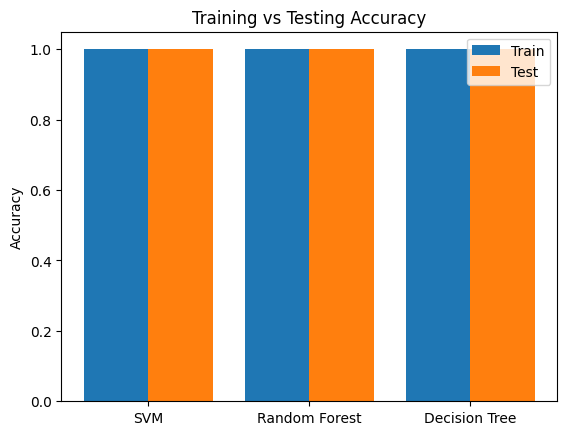

In [12]:
models = ["SVM", "Random Forest", "Decision Tree"]
train_acc = [svm_train_acc, rf_train_acc, dt_train_acc]
test_acc = [svm_test_acc, rf_test_acc, dt_test_acc]

x = np.arange(len(models))

plt.bar(x - 0.2, train_acc, 0.4, label="Train")
plt.bar(x + 0.2, test_acc, 0.4, label="Test")

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.show()


In [13]:
best_model = rf


In [14]:
y_pred = best_model.predict(X_test)

print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Final Test Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        25
         Yes       1.00      1.00      1.00        23

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Confusion Matrix:

[[25  0]
 [ 0 23]]


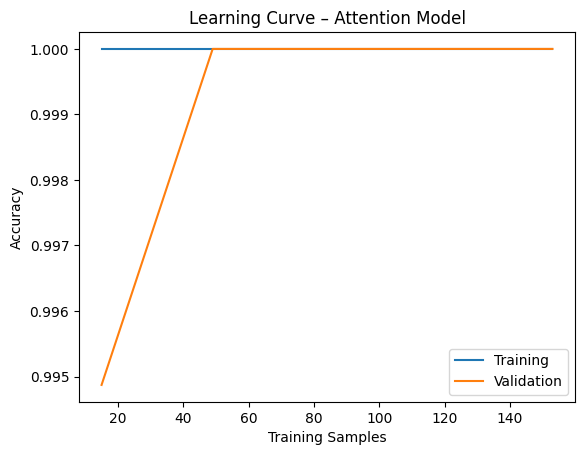

In [15]:
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    cv=5, scoring="accuracy"
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Attention Model")
plt.legend()
plt.show()


In [18]:
import pandas as pd

def predict_memory(
    a12_score, a12_time,
    a13_score, a13_time,
    accuracy_rate, skip_rate
):
    input_df = pd.DataFrame([{
        "activity12_score": a12_score,
        "activity12_time_sec": a12_time,
        "activity13_score": a13_score,
        "activity13_time_sec": a13_time,
        "accuracy_rate": accuracy_rate,
        "skip_rate": skip_rate
    }])

    pred = best_model.predict(input_df)[0]

    return "YES - Memory Impairment" if pred == 1 else "NO - Normal Memory"


In [22]:
result = predict_memory(
    a12_score=-1,      # correct
    a12_time=92,      # seconds
    a13_score=-1,      # skipped
    a13_time=100,
    accuracy_rate=0.10,
    skip_rate=0.90
)

print(result)


NO - Normal Memory
